In [25]:
# Let’s load the libraries

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# nltk.download('punkt')

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [ ]:
train = pd.read_csv('/home/arthur/TCC/datasets/myPersonality_workshop-dataset/mypersonality_final.csv', sep=',', encoding='cp1252')

In [26]:
train_copy = train.copy(deep=True)
train_copy = train_copy.filter(items=['#AUTHID','STATUS','cEXT','cNEU','cAGR','cCON','cOPN'])

In [ ]:
train_copy['cEXT'].value_counts()

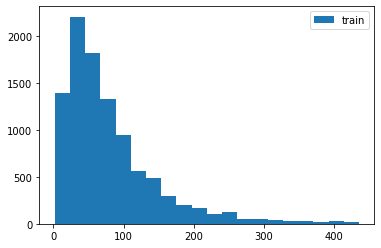

In [27]:
plt.hist(train.STATUS.str.len(), bins=20, label='train')
plt.legend()
plt.show()

In [ ]:
# Pattern removal function creation
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
# New column(tydy_status) creation and punctuation,numbers and special characters removal
train_copy['tidy_status'] = np.vectorize(train.STATUS.str.replace)("[^a-zA-Z#]", " ") 
train_copy.head(10)

In [ ]:
# Transforming into lower case
train_copy.tidy_status = train_copy.tidy_status.str.lower()
train_copy.head()

In [ ]:
# Tokenization 
tokenized_tweet = train_copy.tidy_status.apply(lambda x: x.split())
tokenized_tweet.head(10)

In [ ]:
# Stop words removal. List of stop words from sci-kit learn.
stop_words = set(ENGLISH_STOP_WORDS)
tokenized_tweet = tokenized_tweet.apply(lambda x: [word for word in x if word not in stop_words])
train_copy.tidy_status = tokenized_tweet
train_copy.head(10)

In [ ]:
# Removing status with number of tokens < 3.
train_copy = train_copy[train_copy['tidy_status'].str.len() > 2]
train_copy.head(10)

In [ ]:
cEXT_column_list = ['#AUTHID','STATUS','cEXT', 'tidy_status']
cNEU_column_list = ['#AUTHID','STATUS','cNEU', 'tidy_status']
cAGR_column_list = ['#AUTHID','STATUS','cAGR', 'tidy_status']
cCON_column_list = ['#AUTHID','STATUS','cCON', 'tidy_status']
cOPN_column_list = ['#AUTHID','STATUS','cOPN', 'tidy_status']


train_cEXT = train_copy.filter(items=cEXT_column_list)
train_cNEU = train_copy.filter(items=cNEU_column_list)
train_cAGR = train_copy.filter(items=cAGR_column_list)
train_cCON = train_copy.filter(items=cCON_column_list)
train_cOPN = train_copy.filter(items=cOPN_column_list)